# Evaluation Project 1 Baseball Case Study
By: TRISHA ROY

Batch: DSNB1022

Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics:https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below.

Downlaod Files: https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

# Importing necessary libraries

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset from github

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
data.head()#this code will show top 5 data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


1.Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
2.target : Number of predicted wins (W)

In [4]:
data.shape

(30, 17)

1.no.of rows=30
2.no.of column=17

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# The terms does not make much sense in our dataset ,so for a better clarification and simplify these terms We did it:
1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.



Comment:
1. float value=-1 in numbers
2. integer value =16 in numbers
3. This dataset has no categorical value and it is regression problem.

In [6]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are null values in the entire dataset.So we don't need to do the imputation part here.

In [7]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Comment -
1. If we just look at mean and 50% columns for different feature we can see data is sightly right skew for most of features.
2. Count is same for each variable.
3. 75% and max values for Errors, Shutout, Run Scored shows presence of possible outliers.


# Distribution of features

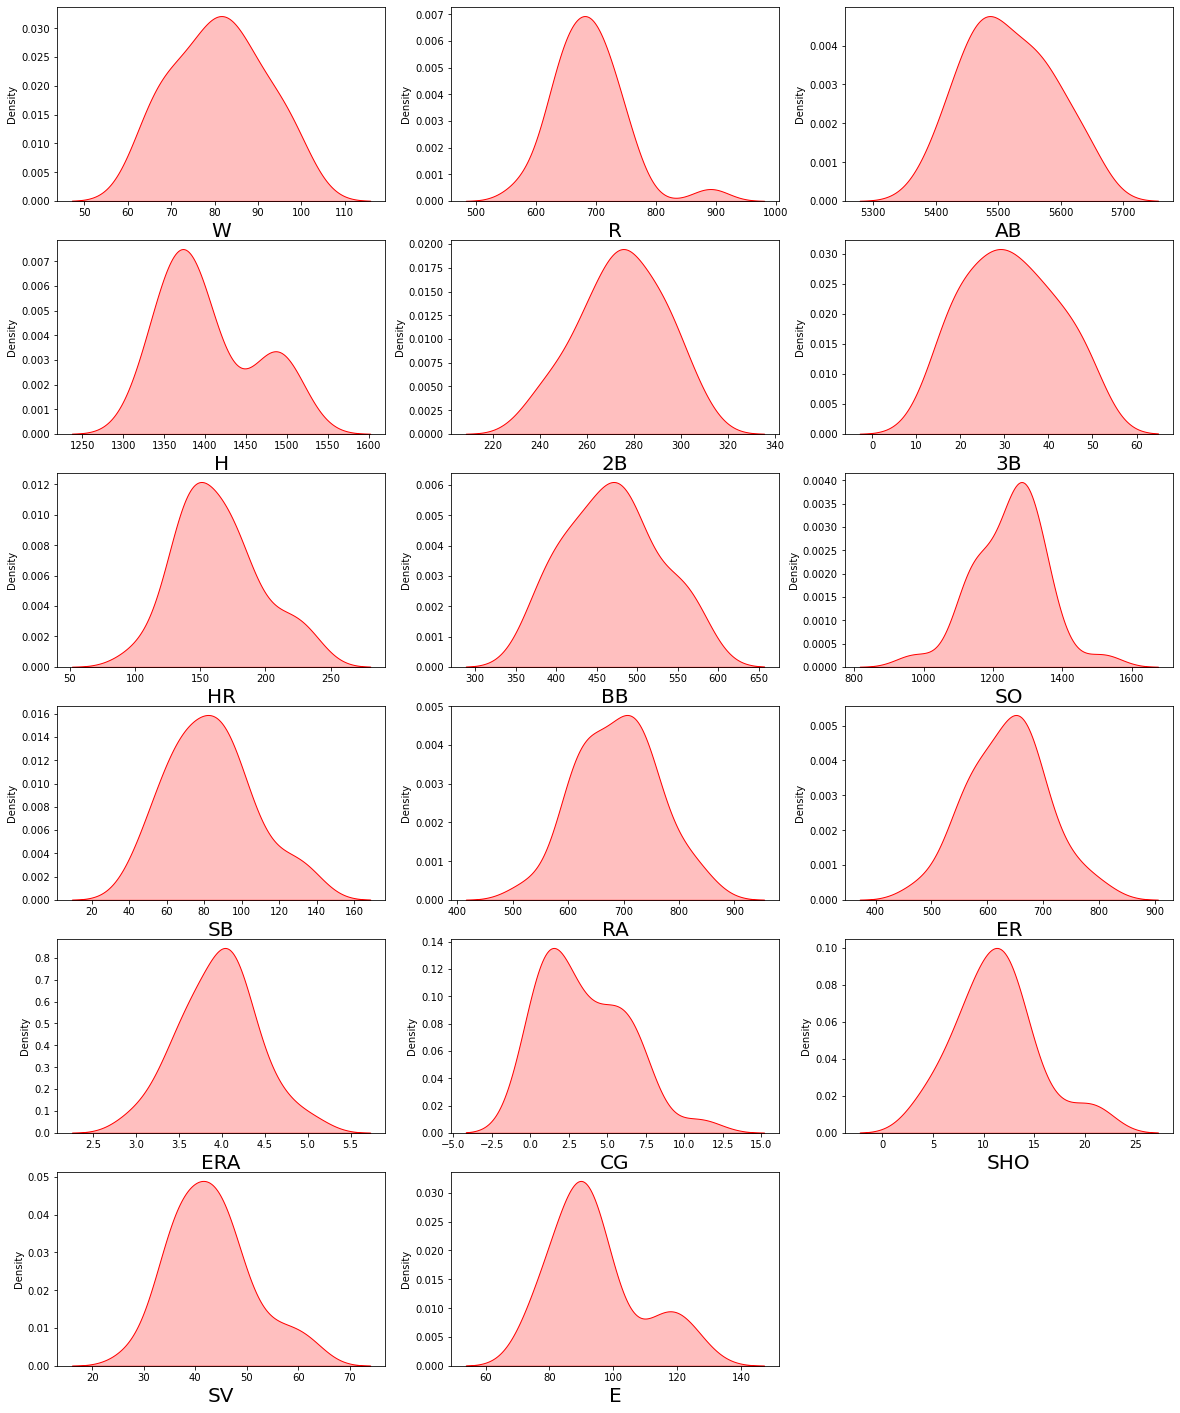

In [8]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in data:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(data[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Comment -
Clearly some of feature are either left or right skewed

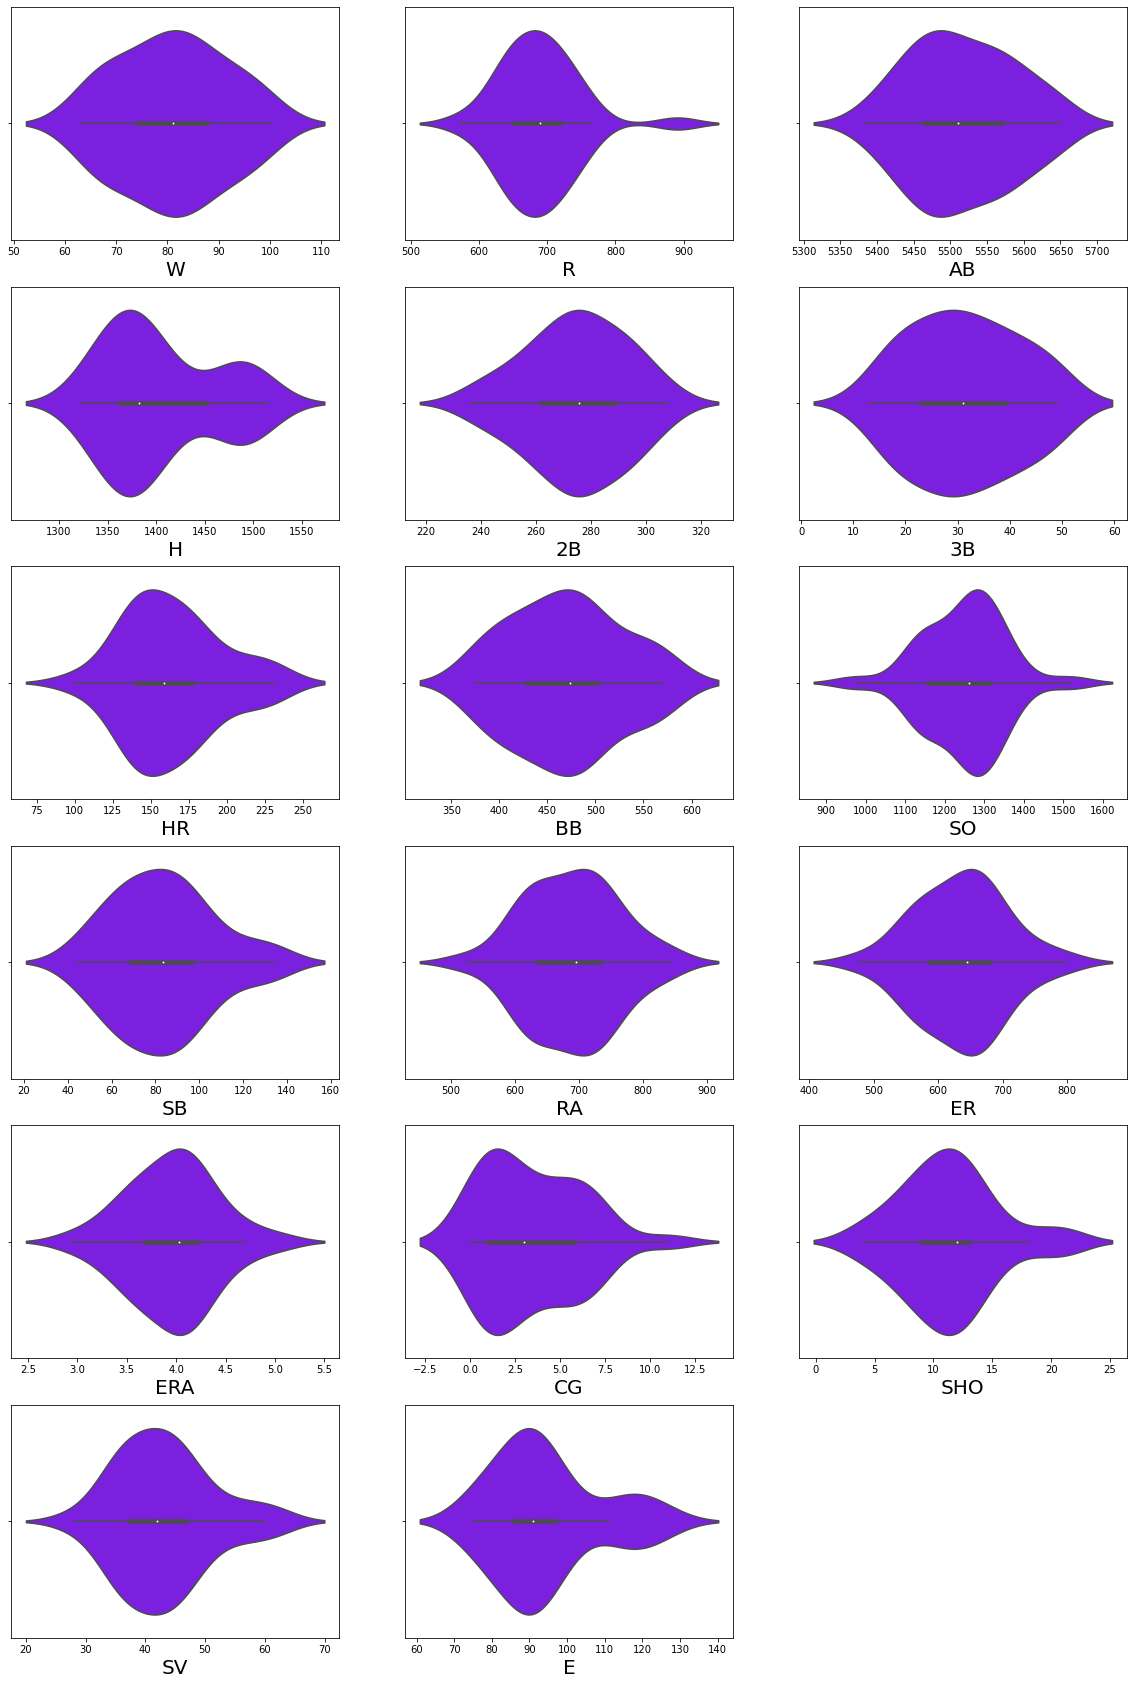

In [9]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
for column in data:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.violinplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

1. Shut outs(SHO) and Complete Game(CG) occur very rarely now-a-days which we can definately see in violinplot of these variable.
2. An Errors(E) does not count as a hit but still counts as an at bat for the batter, So need to dive into how much Error are contributing to at bat.
3. Most of saves (SV)are between 30 & 50. Saves doesnot entitle pitcher as wining pitcher but still it bring wins for team.It will be interesting what relation wins and save held or how much saves contribute in win.
4. Run average(RA), Earned run (ER)and Earned run average(ERA) are important for pitcher statstics. We can see there is not much difference in plot of Earned run and Run Average, so from here we can conclude that Unearned Run doesnot making much difference in wins.
5. Homeruns(HR) (125 to 175 peak) are more than triples (20 to 40 majority) so most of good shot by battar directly convert into homeruns.
6. As we know pitcher try to keep Earned run Average low which eventually lead to wins. Here for most of game ERA is around 3.5-4.5.


Text(0, 0.5, 'Hits')

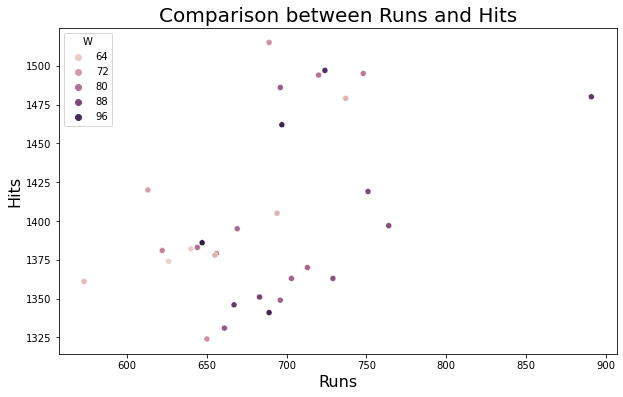

In [10]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and Hits',fontsize =20)
sns.scatterplot(data['R'],data['H'],hue=data['W'])
plt.xlabel('Runs',fontsize =16)
plt.ylabel("Hits",fontsize =16)

1. Even hits is less than 1375 still run in range of 650 to 750 contribute to win.
2. Very less wining chance for run less than 650 and no of hits less than 1325.
3. There is one outlier in runs. After checking sknewness we can decide whether to keep to while building ML model or remove it even if it is valid data point. Definitely it will affect performance of ML model if we consider outlier data points as most of data point will not fall in that side. potential leading to biased model.

Text(0, 0.5, 'Home Runs')

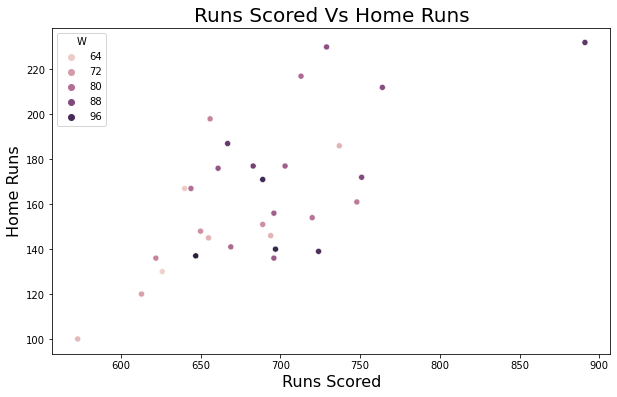

In [11]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Home Runs',fontsize =20)
sns.scatterplot(data['R'],data['HR'],hue=data['W'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Home Runs',fontsize =16)

1. Home Runs in range of 140 & 180 with combination of Run Scored in between 650-750 lead to more than 90 Wins for team. So keeping home runs in this range is cruical for more possibility of wins.
2. But still its game, anything is possible with good performance of single winning player. We can see from scatter plot some of the datapoints have homeruns above 200, but still in wins are around 80.
3. In conclusion we can say that Home runs is definitely contributing factor for team to win but not sufficient to make sure win.

Text(0, 0.5, 'At Bat')

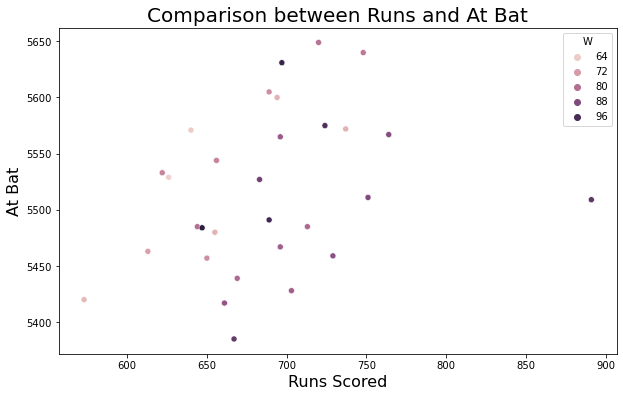

In [12]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and At Bat', fontsize =20)
sns.scatterplot(data['R'],data['AB'],hue=data['W'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel("At Bat",fontsize =16)

Comment :
 We get here that At Bat and Run Scored has positive linear relationship, which means that more Run Scroed naturally lead to more at bats.


Text(0, 0.5, 'Strike Outs')

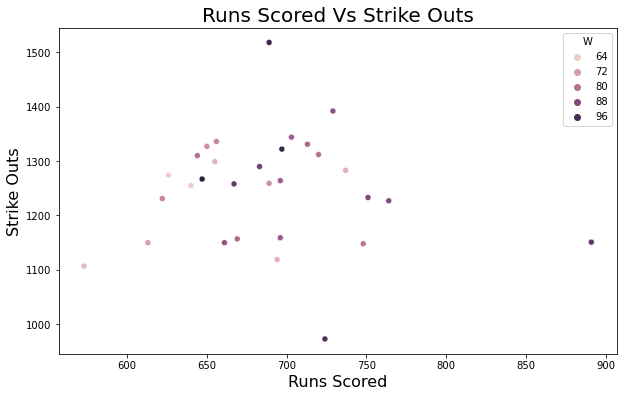

In [13]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Strike Outs',fontsize =20)
sns.scatterplot(data['R'],data['SO'],hue=data['W'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Strike Outs',fontsize =16)

Comment :
1. In simple word strike Outs means batter is out. We can see Strike out opponent team below 700 runs essential for more win.
2. Clearly Strikeout below 1200 is like making recipe for losing game. 

Text(0, 0.5, 'Earned Run Average')

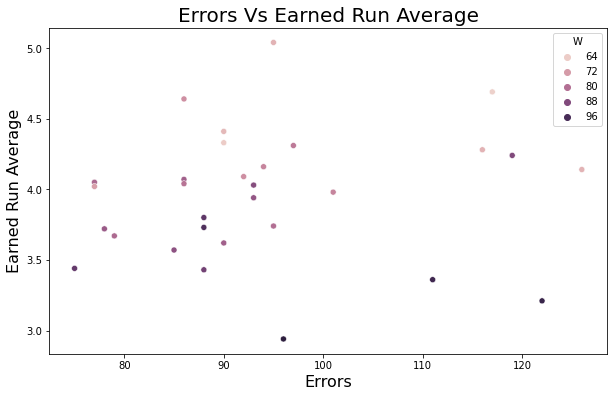

In [14]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Errors Vs Earned Run Average',fontsize =20)
sns.scatterplot(data['E'],data['ERA'],hue=data['W'])
plt.xlabel('Errors',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

Comment -
1. Same result about ERA we got here as we get in Violin Plot.
2. Keeping ERA between 3.5 to 4.0 or as much as low by Pitcher means sure win. By keeping low ERA pitcher saves run for his team.
3. Another things we can see in above scatter plot is that Minimum error means maximum wins. Keeping Errors below number 90 or 100 can be held as benchmark.

# BoxPlot

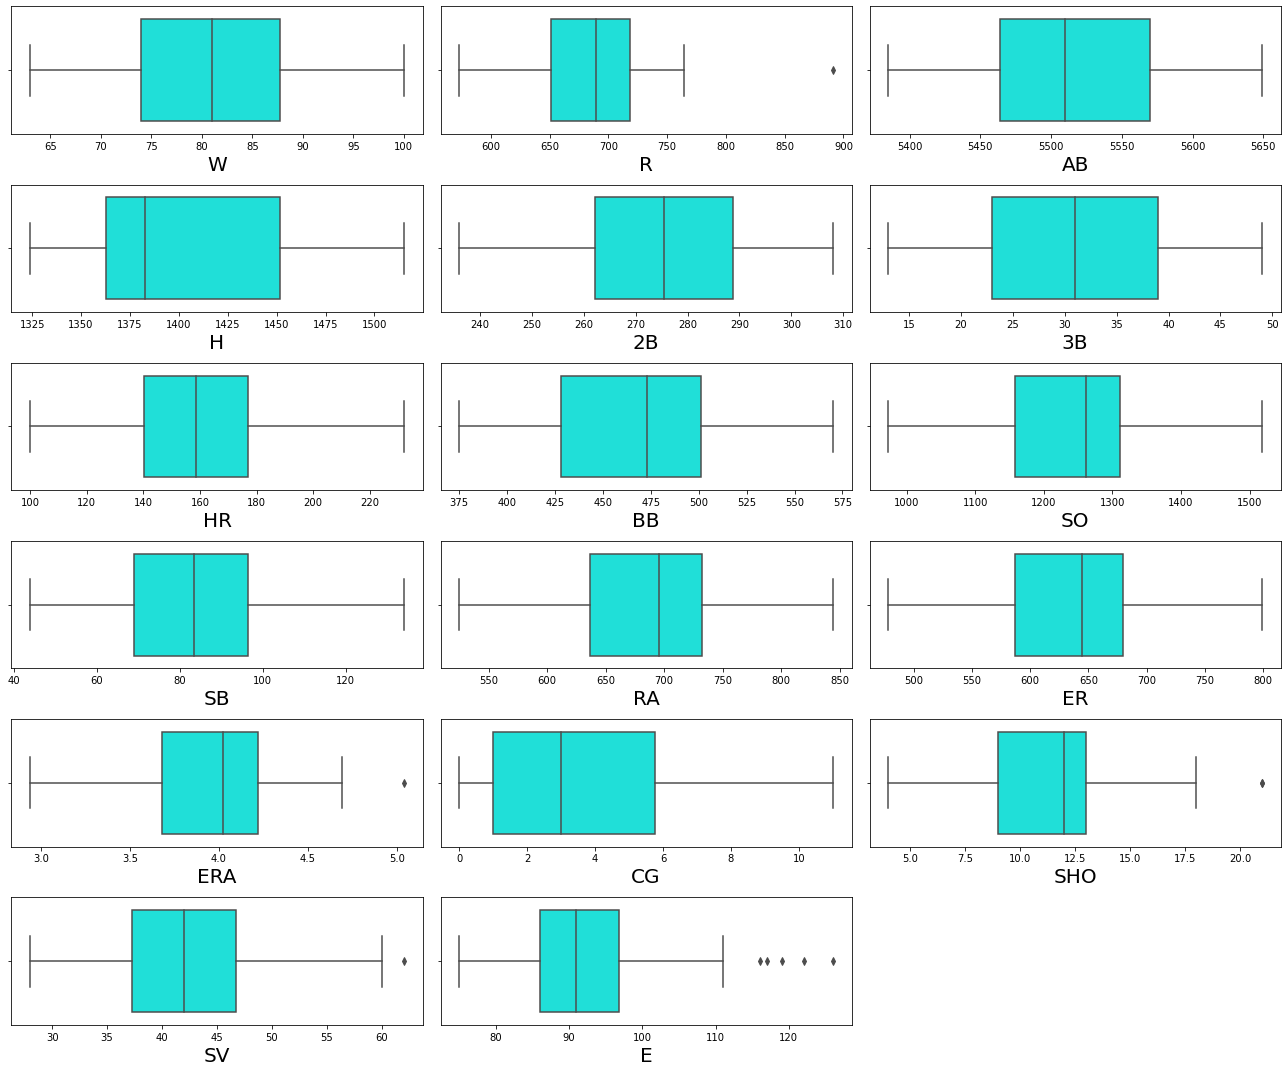

In [15]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in data:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(data[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Comment :
1. There are some outliers present in data. But as data is of Real world MLB 2014, these outliers are valid datapoints.
2. Shutouts are rare but completely possible with exceptional performance.
3. Run scored has one outliers, but as Run is one of the most important parameter, it will be wise to remove corresponding datpoint.
4. Outliers in Errors are totally possible, so now need to worry about it.

# BarPlot

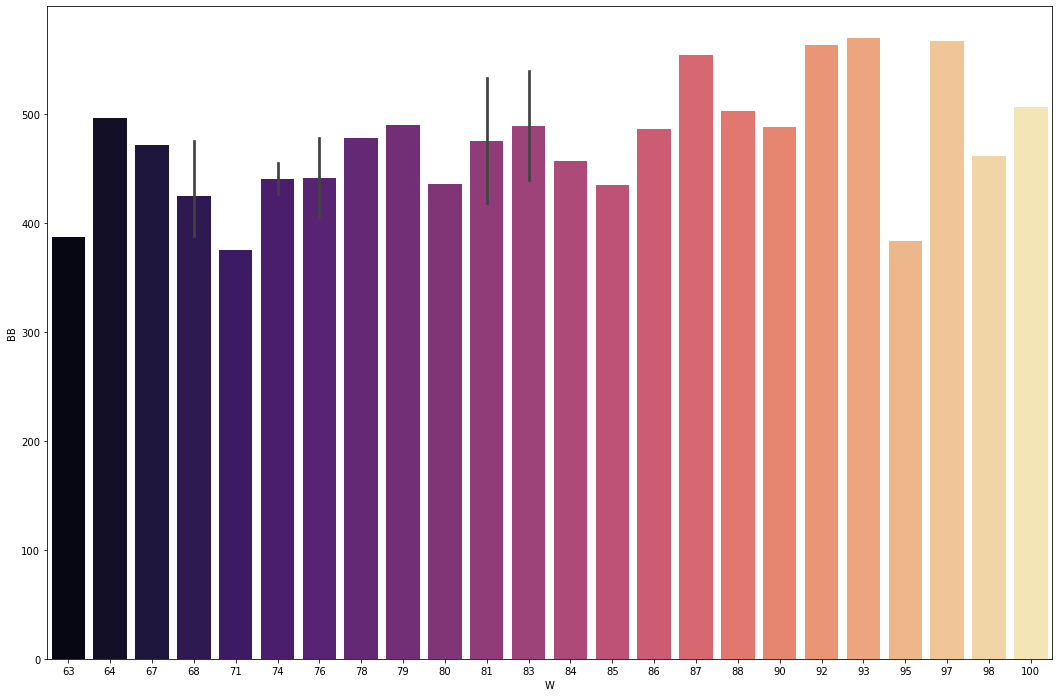

In [16]:
plt.figure(figsize=(18,12))
sns.barplot(x="W", y="BB", data=data,palette='magma')
plt.show()

Comment: 
1. We can see that base on ball(BB) above 400 really contribute in Wins(W) in team.

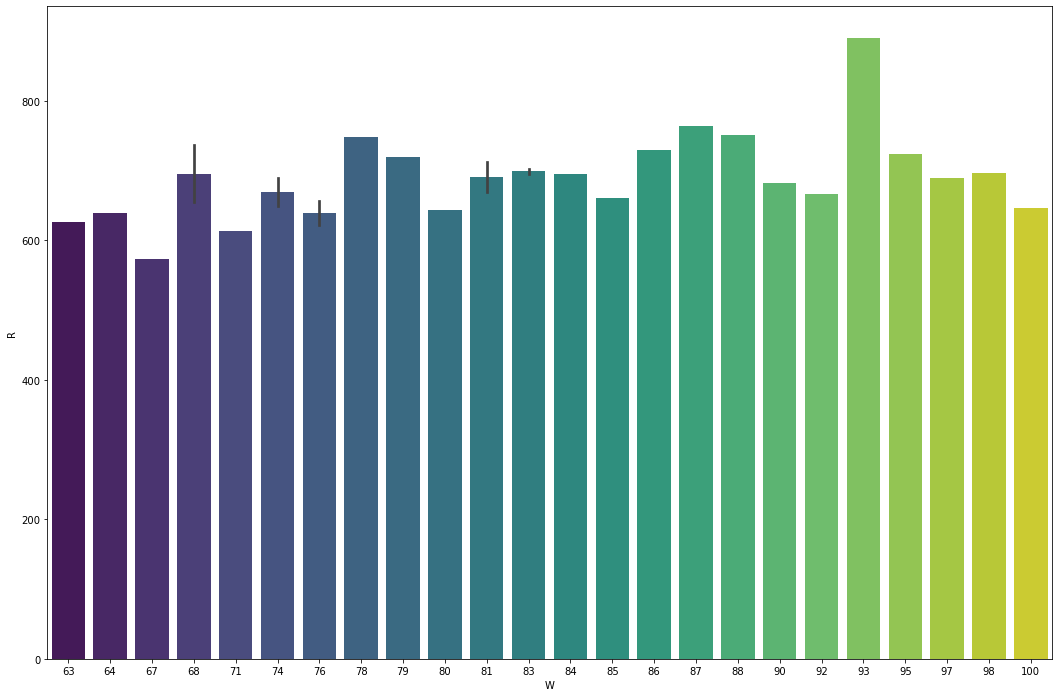

In [17]:
plt.figure(figsize=(18,12))
sns.barplot(x="W", y="R", data=data,palette='viridis')
plt.show()

Comment:
Run Scored above 600 is benchmark for wining in any scenerio

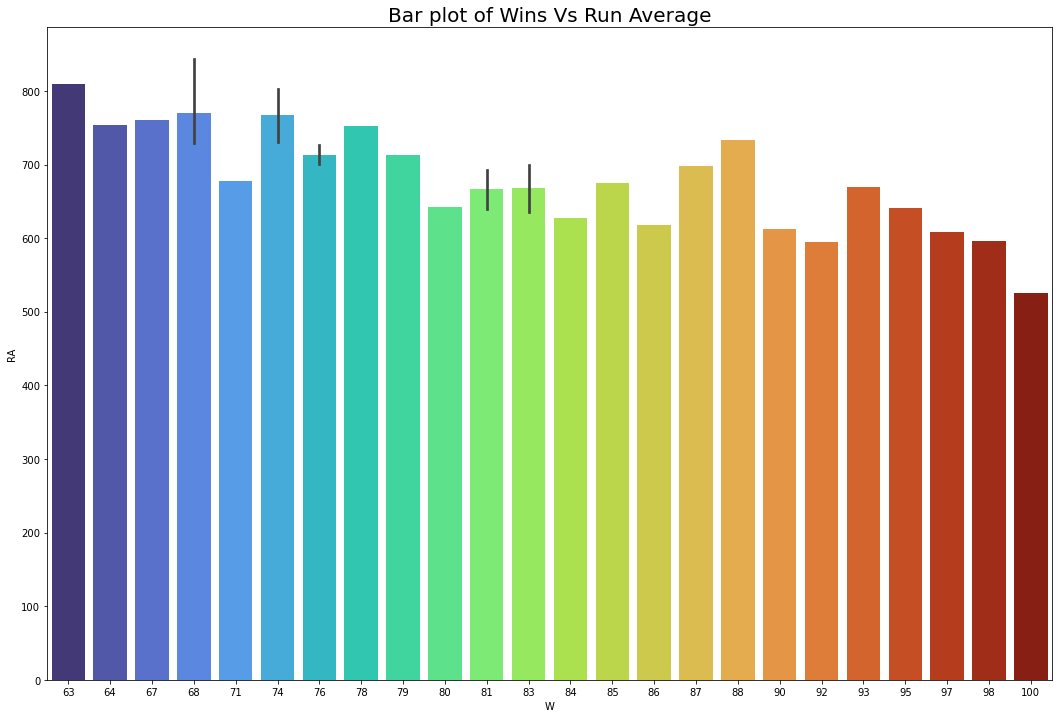

In [18]:
plt.figure(figsize=(18,12))
sns.barplot(x="W", y="RA", data=data,palette='turbo')
plt.title('Bar plot of Wins Vs Run Average', fontsize =20)
plt.show()

Comment:
1. Higher the run average lower is the wining chance. That means perforamance of pitcher is better than hitter i.e. pitcher is knocking out hitter at low run score.

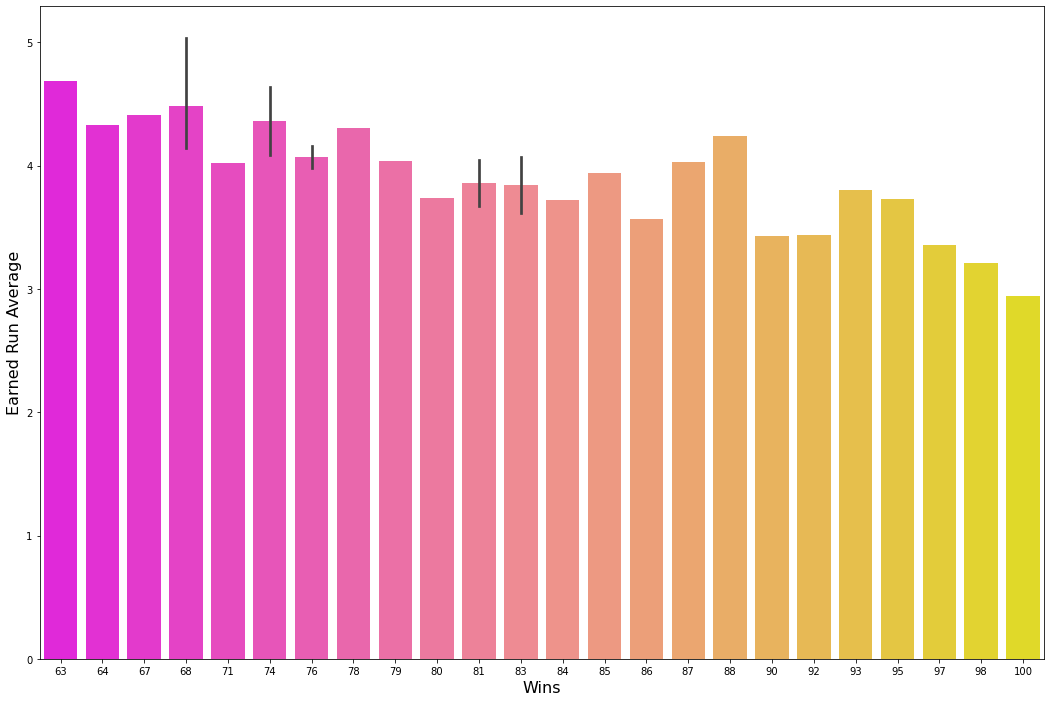

In [19]:
plt.figure(figsize=(18,12))
sns.barplot(x="W", y="ERA", data=data,palette='spring')
plt.xlabel('Wins',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)
plt.show()


Comment:
1. ERA is low for maximum wins. Low ERA by pitcher clearly means that pitcher is giving less chance given to batter to score run.
2. We already come to conclusion of keeping ERA less than 3.5-4.0 in previous result. This plot also support that story.
3. But this also indicate that ERA and Runs Average score are bound to related with each other in linear relationship (may be positive or negtive).
4. Another things here is that Earned Run and Wins must have negative relationship. we will check it in further investigation.

# Strip Plot

Text(0, 0.5, 'Earned Run Average')

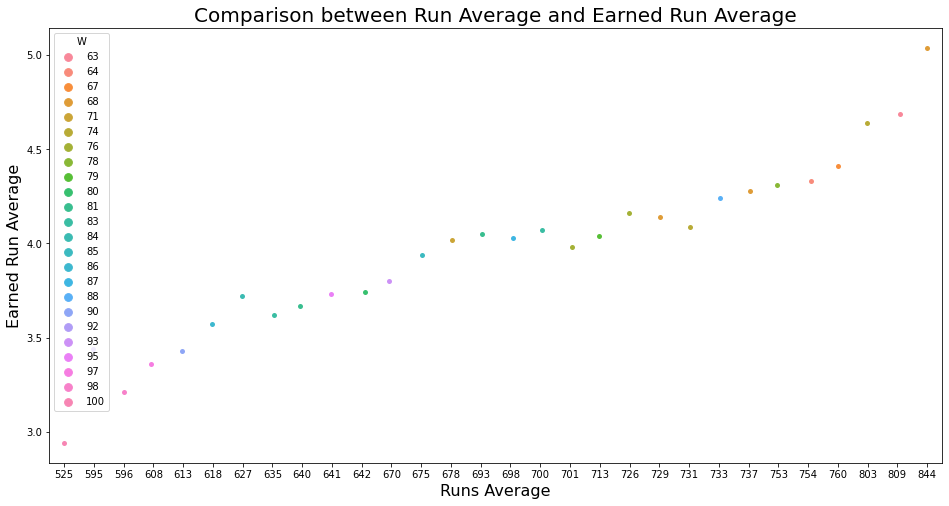

In [20]:
# Checking the relation between two variables
sns.set_palette('Set3')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Run Average', fontsize =20)
sns.stripplot(data['RA'],data['ERA'],hue=data['W'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Earned Run Average",fontsize =16)

Comment :
1. Here we got what we suspect in previous plot. ERA and RA hold linear relationship.

Text(0, 0.5, 'Strike Outs')

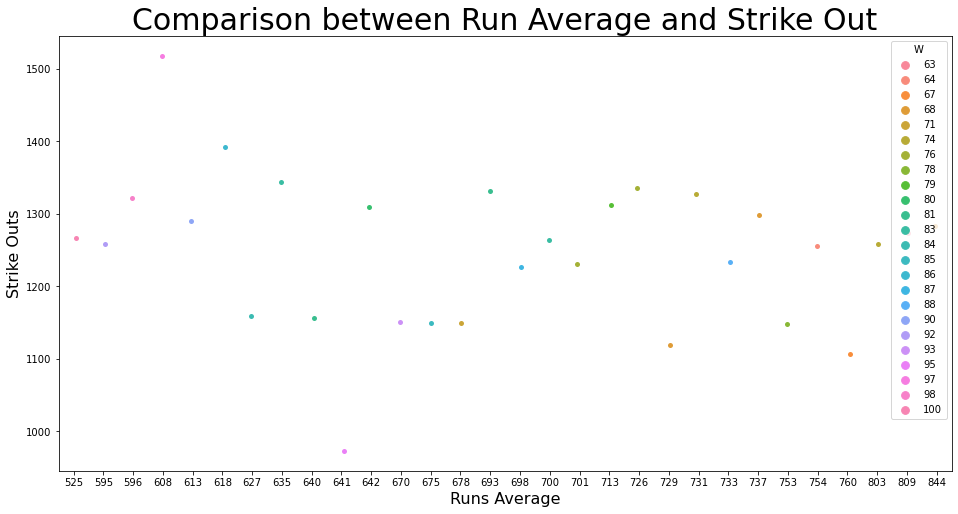

In [21]:
# Checking the relation between two variables
sns.set_palette('viridis')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Strike Out', fontsize =30)
sns.stripplot(data['RA'],data['SO'],hue=data['W'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Strike Outs",fontsize =16)

Comment :
1. Strike outs are randomly placed giving not much any significant insights. Most probably strikeouts doesnot matter.

# In one of the previous result we suspect that Earned Run/Earned Run Average and Wins must have negative relationship, let check by looking at jointplot.

# Joint Plot :

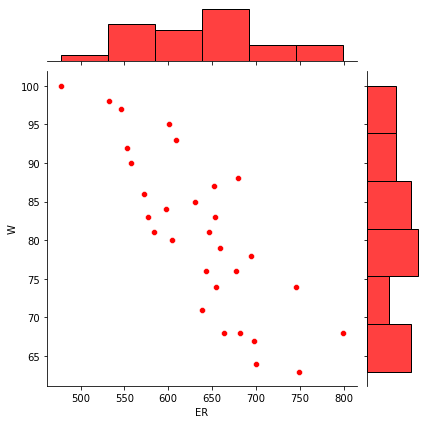

In [22]:
sns.jointplot(x="ER", y="W", data=data, color="red",palette="Set1")

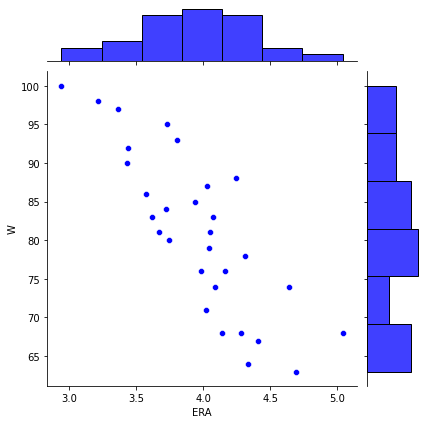

In [23]:
sns.jointplot(x="ERA", y="W", data=data, color="blue",palette="Set1")

Comment:
1. Here we got what we suspected previously,Jointplot shows same story about Earned Run/Earned Run Average and Wins having linear negative relationship

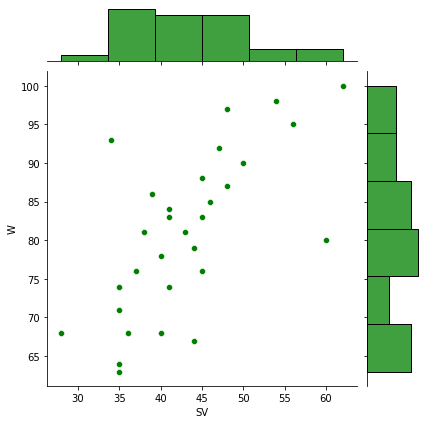

In [24]:
sns.jointplot(x="SV", y="W", data=data, color="Green")

Comment:
1. Here with increase in the number of save increases the number of wins.

# Pair Plot

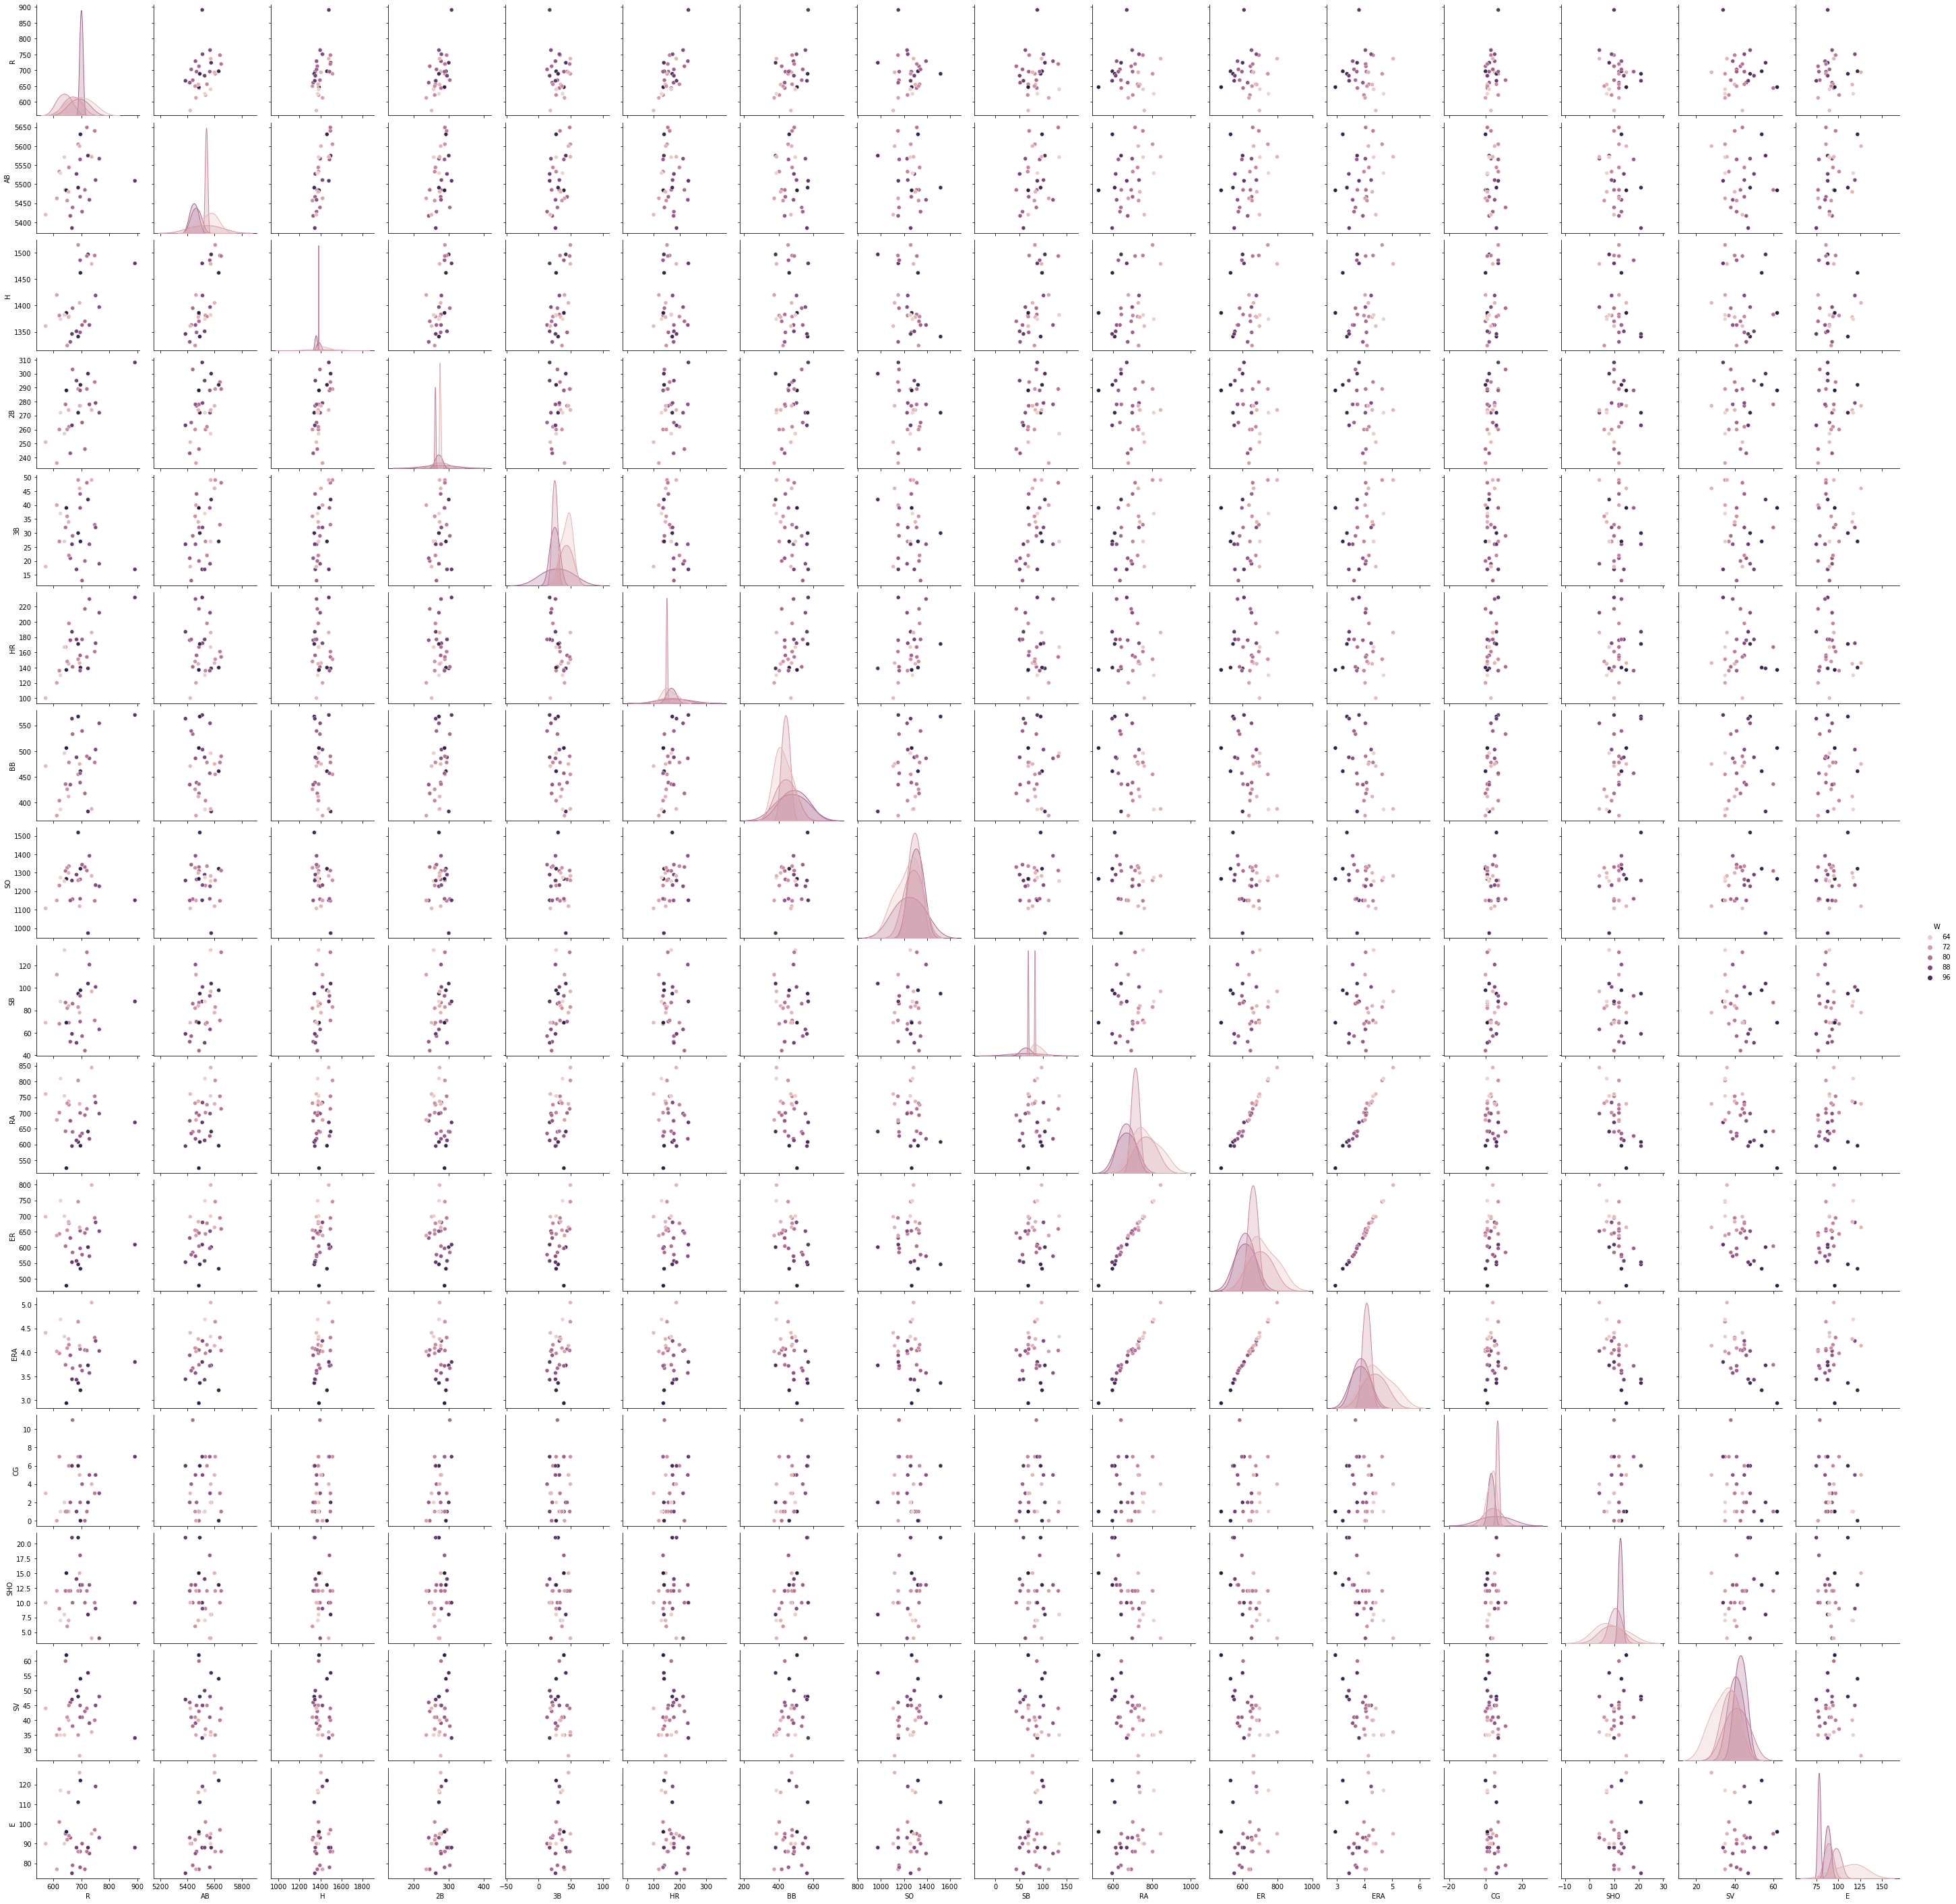

In [25]:
sns.pairplot(data, hue="W")

# Outliers Detection and Removal

In [26]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
df = data[(z<3).all(axis = 1)]

In [27]:
df.shape

(29, 17)

Comment:
1. We need to remove the outliers in the best possible way,so here we applied zscore.Behind the scene this method uses z=(x-mean)/standard deviation .if standard deviation(std)=1,it covers 68% data,std=2 it covers 95% data and if std=3 it covers 99.7% data. We used here std=3 as it covers max data and 0.3% is outliers.
2. Here we can see the difference in our shape of the dataset .It is reduced from 30 to 29. There were some outliers

# Data loss in percentage

In [28]:
print(((30-29)/30)*100)

3.3333333333333335


Comment:
1. 3.33% data is lost due to zscore method(outlier removal technique).

# Feature selection and Engineering

# Skewness of features

In [29]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Comment -
1. Optimal range for skewness is -0.5 to 0.5.
2. Hits(H), Complete Game(CG), Shuts Outs(SHO), Saves(SV), Errors(E) are positively Skewed in nature, need to transform.

In [30]:
#Transforming positive or right skew data using boxcox transformation
#from scipy.stats import boxcox

In [31]:
#df['H']=boxcox(df['H'],0.5)

In [32]:
#df['SHO']=boxcox(df['SHO'],0.5)

In [33]:
#df['SV']=boxcox(df['SV'],0.5)

In [34]:
#df['E']=boxcox(df['E'],0.5)

Comment:
1. Box-Cox requires all samples to be positive, while Yeo-Johnson has no restrictions
2. Complete game(CG) does not consist of all positive value ,so we can not perform box-cox method.

# Yeo-Johnson 

In [35]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [36]:
C=['CG','H','E','SHO','SV']
ds =df[C].copy()

In [37]:
column_trans =ColumnTransformer([('CG',PowerTransformer(method='yeo-johnson',standardize=True),['CG']),
                                 ('H',PowerTransformer(method='yeo-johnson',standardize=True),['H']),
                                ('E',PowerTransformer(method='yeo-johnson',standardize=True),['E']),
                                ('SHO',PowerTransformer(method='yeo-johnson',standardize=True),['SHO']),
                                ('SV',PowerTransformer(method='yeo-johnson',standardize=True),['SV'])])
transformed_yeojohnson =column_trans.fit_transform(df)   
new_cols=['CG','H','E','SHO','SV']
dataset=pd.DataFrame(transformed_yeojohnson,columns=new_cols) #to convert numpy array back into dataframe
pd.concat([dataset],axis=1)
dataset.head()

,CG,H,E,SHO,SV
0,-0.307098,0.0,-0.348265,-0.787002,1.532753
1,-0.307098,0.0,-0.540820,0.236737,0.312020
2,2.011315,0.0,-1.326125,-0.252844,-0.664137
3,1.264463,0.0,0.650818,-0.513555,-0.820689
4,1.264463,0.0,-0.540820,0.236737,-1.149165


In [38]:
df.reset_index(drop=True, inplace=True)
dataset.index=df.index
df[C]=dataset[C]

# Skewness after transforming features

In [39]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Comment:
 We prefer to apply yeo-johnshon method, because we faced 2 problems in this particular project-
 1. box-cox method is applicable only for positive value,here CG does not contain all positive value
 2. After performing box cox when we checked the skewness  it was almost same as before.Whereas when we performed Yeo-johnson and checked the skewness we got almost a normal data which matches the optimal skewness range -0.5 to 0.5.

# Correlation

In [40]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,NaN,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.007696,0.481626,0.756713,-0.079633
R,0.390451,1.000000,0.438022,NaN,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.155122,-0.113640,0.083261,0.039865
AB,-0.085780,0.438022,1.000000,NaN,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.059648,-0.194219,-0.147964,0.332002
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2B,0.384886,0.469293,0.490752,NaN,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.227220,0.088226,0.241326,0.152541
3B,-0.206737,0.134204,0.445604,NaN,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.004496,-0.066384,-0.269255,0.080498
HR,0.245697,0.586894,-0.064653,NaN,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.118284,-0.024448,0.106523,-0.165883
BB,0.447513,0.258450,-0.137850,NaN,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.445335,0.441043,0.207948,-0.056106
SO,0.156469,0.081158,-0.111243,NaN,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.063129,0.204704,0.125572,0.164817
SB,-0.169503,0.075323,0.373674,NaN,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.040524,-0.100054,-0.195772,0.070527


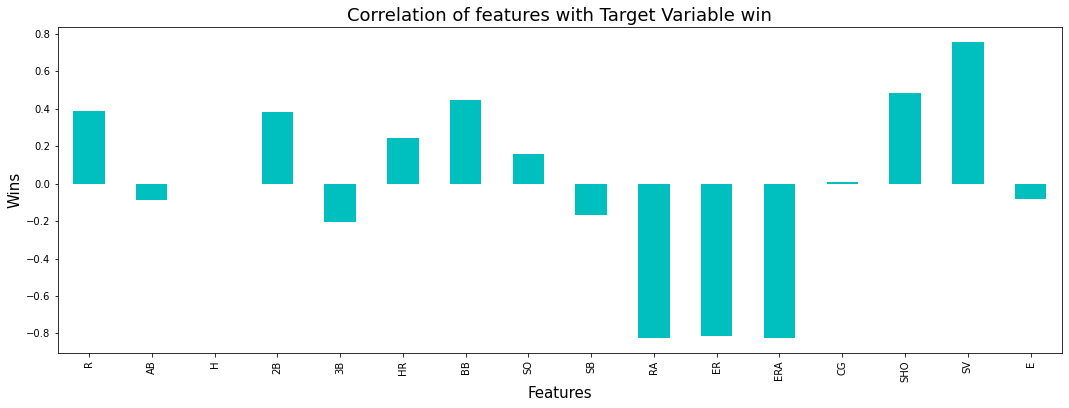

In [41]:
plt.figure(figsize = (18,6))
df.corr()['W'].drop(['W']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.title('Correlation of features with Target Variable win',fontsize = 18)
plt.show()

Comment :
1. Hits, At bats, Complete game and errors are very poorly correlated with target variable.
2. Saves, ERA,RA,ER are highly correleated with target variable.
3. here is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average". This need to check

# Checking Multicollinearity between features using variance_inflation_factor(VIF)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [43]:
X = add_constant(df.drop(columns=['W']))
# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

   Variable           VIF
0     const  52780.300431
1         R      6.228510
2        AB     11.156523
3         H           NaN
4        2B      3.522497
5        3B      3.210581
6        HR      7.373076
7        BB      3.230566
8        SO      2.798374
9        SB      1.774505
10       RA    196.171346
11       ER   1920.321732
12      ERA   1378.434516
13       CG      2.580312
14      SHO      3.166773
15       SV      5.082916
16        E      1.785718


Comment :
1. It is natural to have such high multicollinearity due to following reason :- a. Earned Run Average,Earned Runs,Runs Average are highly correlated with each other. b.Another most important reason is data need to scale which we did not scale until now.

2. Strategy to Address Multicollinearity :
a. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
b. Another way to address Multicollinerity is to Scaled Data and then apply PCA.
We will go by Second way for further investigation.

# Standard Scalar

In [44]:
X=df.drop(columns =['W'])
Y=df['W']

In [45]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# PCA(Principal Component Analysis)

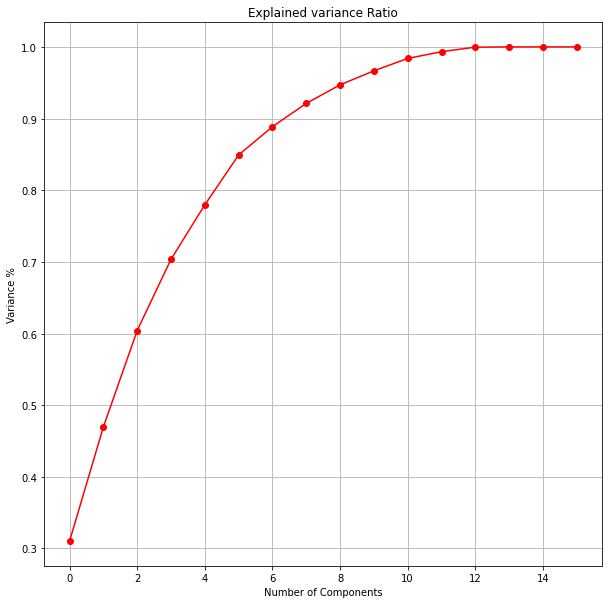

In [46]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

Comment -
AS per the graph, we can see that 8 principal components attribute for 95% of variation in the data. We shall pick the first 8 components for our prediction

In [47]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X_scale)

In [48]:
principle_x=pd.DataFrame(x_new,columns=np.arange(8))

# Checking Multicollinearity after applying PCA

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7


# Model Building

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)

# Linear Regression

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print(y_pred)
print('\n')
print(Y_test)


[90.30384962 90.55399654 81.307974   64.71028677 85.00177944 73.3557678
 77.05890791 74.08527304]


2     81
15    98
26    79
23    63
5     87
4     74
6     81
17    68
Name: W, dtype: int64


In [54]:
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
r2_score(Y_test,y_pred)

Mean absolute error : 4.179616465935263
Mean squared error : 25.903385662856195
Root Mean Squared Error: 5.089536880980056


 R2 Score :


0.7517866922559071

 True Values Vs Predicted Value plot :


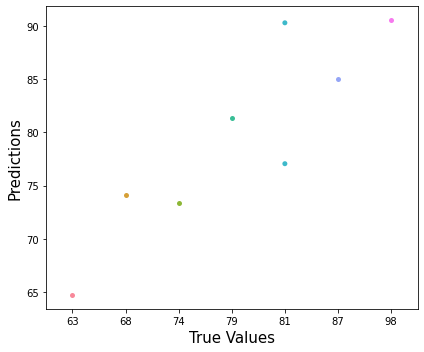

In [57]:
plt.figure(figsize=(6,5))
y_pred=lin_reg.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

In [59]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
ls= Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, normalize=True)
xgb=XGBRegressor()
model = [rf,ls,rd,svr,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
   



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 5.273841666666668
Mean squared error : 39.892853102777806
Root Mean Squared Error: 6.316078934178847


 R2 Score :
0.6177357989852104


 Error of  Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :
Mean absolute error : 4.127907337921478
Mean squared error : 25.290203388928635
Root Mean Squared Error: 5.0289366061751695


 R2 Score :
0.757662372077941


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 4.195533492027591
Mean squared error : 25.862073842004413
Root Mean Squared Error: 5.085476756608412


 R2 Score :
0.7521825533929807


 Error of  SVR(epsilon=0.2, gamma='auto', kernel='poly') :
Mean absolute error : 5.121764417733829
Mean squared error : 42.20399076711373
Root Mean Squared Error: 6.496459864196325


 R2 Score :
0.5955898474179849


 Error of  DecisionTreeRegressor(criterion='mse') :
Mean absolute error : 5.125
Mean squared error : 34.625
Root Mean Squared Err



 True Values Vs Predicted Value plot RandomForestRegressor(max_depth=6, n_estimators=250) :


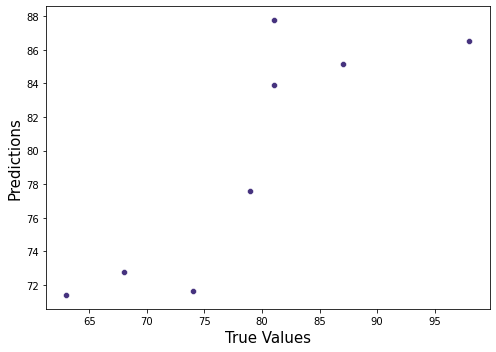





 True Values Vs Predicted Value plot Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :


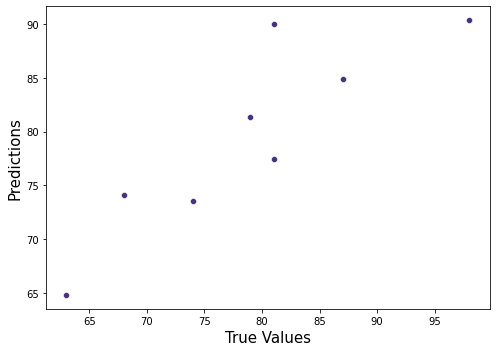





 True Values Vs Predicted Value plot Ridge(alpha=0.01, normalize=True) :


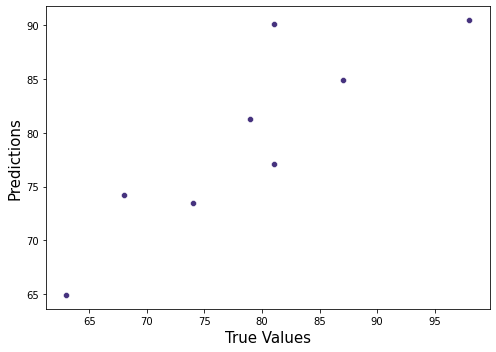





 True Values Vs Predicted Value plot SVR(epsilon=0.2, gamma='auto', kernel='poly') :


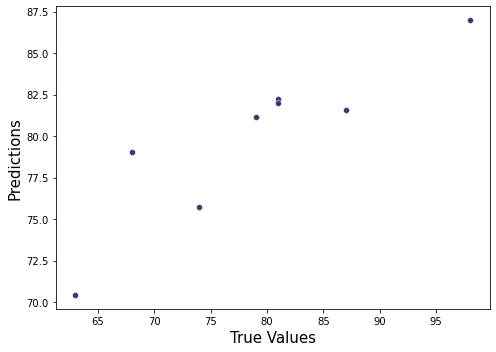





 True Values Vs Predicted Value plot DecisionTreeRegressor(criterion='mse') :


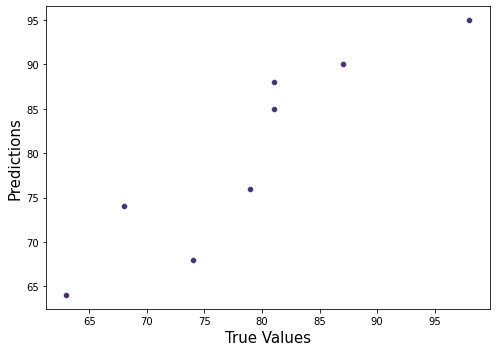





 True Values Vs Predicted Value plot AdaBoostRegressor(learning_rate=0.1) :


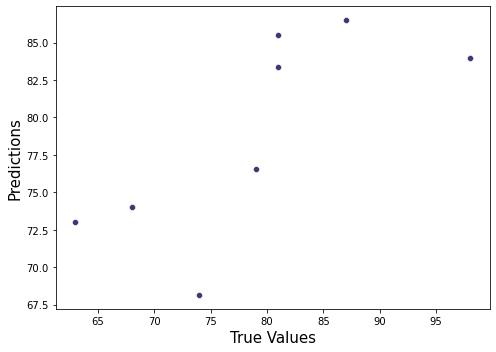





 True Values Vs Predicted Value plot GradientBoostingRegressor(max_depth=6) :


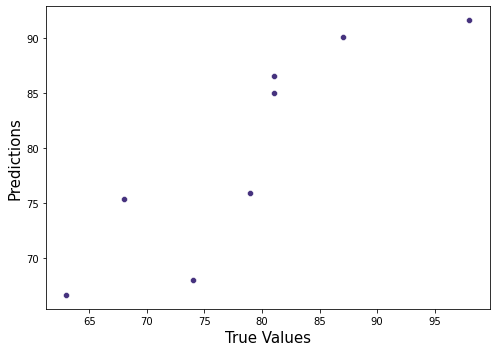





 True Values Vs Predicted Value plot XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) :


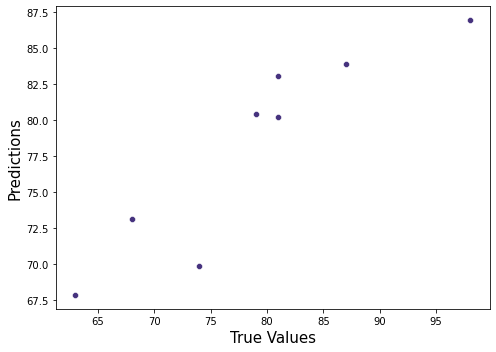

In [60]:
model = [rf,ls,rd,svr,dtc,adb,gradb,xgb]

for m in model:
    plt.figure(figsize=(7,5))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

# We can clearly see that GradientBoostingRegressor's R2 score is 76.9%.We will do hyperparameter tuning on this.

In [63]:
param_dist = {
    'n_estimators': np.arange(50, 251, 10),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'subsample': [0.8, 0.9, 1.0]
}

# Create Gradient Boosting Regressor model
grabd = GradientBoostingRegressor()

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(
    grabd, param_distributions=param_dist, n_iter=100,
    scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, Y_train)

# Get best hyperparameters
best_params = random_search.best_params_

# Evaluate on test set
best_model = random_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_mse = np.mean((test_predictions - Y_test)**2)

print("Best Hyperparameters:", best_params)
print("Test Mean Squared Error:", test_mse)





Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 210, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 8, 'learning_rate': 0.2}
Test Mean Squared Error: 28.867539141586903


# Final model

In [81]:
final_model=GradientBoostingRegressor(subsample= 1.0, 
                                      n_estimators= 249,
                                      min_samples_split= 8, 
                                      min_samples_leaf= 2, 
                                      max_depth= 8,
                                      learning_rate= 0.8)
final_model.fit(X_train,Y_train)
y_pred=final_model.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')




 Error in Final Model :
Mean absolute error : 3.8006281803711506
Mean squared error : 20.583866761336605
Root Mean Squared Error: 4.536944650459889


 R2 Score of Final Model :
0.8027597735101748




Comment:
1. Here we did not use the all best params ,because there were no visible change in R2 score,So just using trial method we  changed the value of some parameters and improved the accuracy 

# Saving the model

In [82]:
import joblib
joblib.dump(final_model,'Baseballn_Final.pkl')

['Baseballn_Final.pkl']